In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
df=pd.read_csv('housing.csv')
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'CRIM'),
  Text(2, 0, 'ZN'),
  Text(3, 0, 'INDUS'),
  Text(4, 0, 'CHAS'),
  Text(5, 0, 'NOX'),
  Text(6, 0, 'RM'),
  Text(7, 0, 'AGE'),
  Text(8, 0, 'DIS'),
  Text(9, 0, 'RAD'),
  Text(10, 0, 'TAX'),
  Text(11, 0, 'PTRATIO'),
  Text(12, 0, 'B'),
  Text(13, 0, 'LSTAT'),
  Text(14, 0, 'MEDV')])

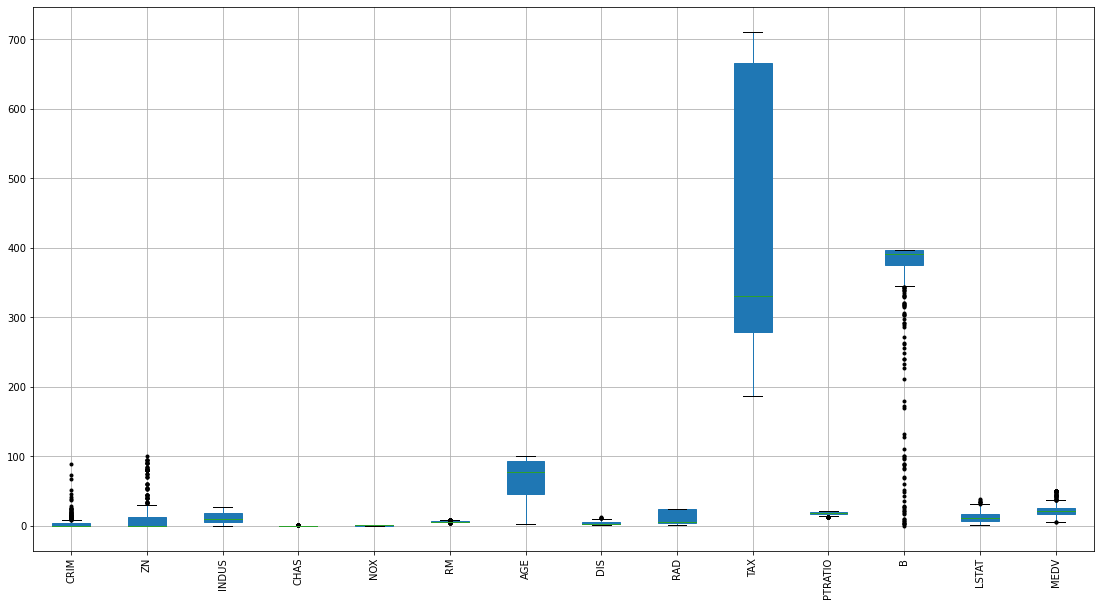

In [3]:
# Importing the visualization package of Python
# Detection of outliers among all variables
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.subplots(figsize=(19,10))
df.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [4]:
# Variables containing Missing values are
# "CRIM", "ZN" , "INDUS", "CHAS", "AGE", "LSTAT"
# ..............................................
# Variables containing Outliers***PHASE 1: TREATMENT OF MISSING VALUES***

***Separate all six variables contain missing values into three groups on the basis of the presence of outliers.***
1. cat_mv = Categorical variable conatining missing values (Missing values will be treated with ***mode***)--- "CHAS"
2. num_mv_out = Numerical variables containing missing values and outliers too (Missing values will be treated with ***median***)--- "CRIM", "ZN" ,"LSTAT"
3. num_mv_noOut = Numerical variables containing missing values but "no outliers" (Missing values will be treated with ***mean***)--- "INDUS", "AGE"
# Numerical Variables: "CRIM", "ZN" , "RM", "DIS", "PTRATIO", "B", "LSTAT","MEDV"

SyntaxError: invalid syntax (1673459244.py, line 6)

In [29]:
#***Initiate the treatment of Missing Values***

In [30]:
# For first category: "cat_mv_out"
cat_mv = pd.concat([df["CHAS"]],axis=1)

In [31]:
cat_mv

,CHAS
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
501,0.0
502,0.0
503,0.0
504,0.0


In [32]:
cat_mv.isnull().sum()

CHAS    20
dtype: int64

In [33]:
cat_mv.mode()

,CHAS
0,0.0


In [34]:
# Replacing the missing values with mode(value 0) to this categorical variable
# replace nan value to zero(mode = 0)
cat_mv.replace(np.nan, 0, inplace=True)

In [35]:
# After replacing with mode(Value = 0), now there is no missing values in this categorical variable
cat_mv.isnull().sum()

CHAS    0
dtype: int64

In [36]:
# dimension (506 Observations and 1 column)
cat_mv.shape

(506, 1)

In [37]:
# For the second category: "num_mv_out" means Numerical variables containing missing values and outliers too
num_mv_out = pd.concat([df["CRIM"], df["ZN"], df["LSTAT"]],axis=1)

In [38]:
num_mv_out.isnull().sum()

CRIM     20
ZN       20
LSTAT    20
dtype: int64

In [68]:
#Each variable has missing values equal to 20 obs

In [40]:
# Describe the  numericaldata which as missing values and outliers.
num_mv_out.describe()

,CRIM,ZN,LSTAT
count,486.000000,486.000000,486.000000
mean,3.611874,11.211934,12.715432
std,8.720192,23.388876,7.155871
min,0.006320,0.000000,1.730000
25%,0.081900,0.000000,7.125000
50%,0.253715,0.000000,11.430000
75%,3.560263,12.500000,16.955000
max,88.976200,100.000000,37.970000


In [41]:
# Replacing the missing values with median of its variables ("num_mv_out")
num_mv_out = num_mv_out.fillna(num_mv_out.median())

In [42]:
# Now, "num_mv_out" has no missing values
num_mv_out.isnull().sum()

CRIM     0
ZN       0
LSTAT    0
dtype: int64

In [43]:
num_mv_out.shape

(506, 3)

In [44]:
# For the third category: "num_mv_noOut" means Numerical variables containing missing values but "no outliers"
num_mv_noOut = pd.concat([df["INDUS"], df["AGE"]],axis=1)

In [45]:
num_mv_noOut

,INDUS,AGE
0,2.31,65.2
1,7.07,78.9
2,7.07,61.1
3,2.18,45.8
4,2.18,54.2
...,...,...
501,11.93,69.1
502,11.93,76.7
503,11.93,91.0
504,11.93,89.3


In [46]:
#checking the variables ; is there any null value present or not
num_mv_noOut.isnull().sum()


INDUS    20
AGE      20
dtype: int64

In [47]:
# Replacing the missing values with mean of its variable ("num_mv_noOut")
# this category doesn't have outliers but having missing values in the two variables
num_mv_noOut = num_mv_noOut.fillna(num_mv_noOut.mean())

In [48]:
# Now, this cateory ("num_mv_noOut") has no missing values
num_mv_noOut.isnull().sum()

INDUS    0
AGE      0
dtype: int64

In [49]:
PHASE 2: TREATMENT OF OUTLIERS

After treatment of missing values, the dataset will have only outliers problems. So, the next treatment will be for outliers.
Now, assign a dataset that will contain all 14 variables including the above three category
("Treated Missing Values" Variables). Finally, split this dataset into three categories. 
But the thing is, Only the first category will be focussed here because the first category contains outliers. 
The second and third categories have no outliers.

num_out = Numerical variables containing outliers (Missing values will be treated with median)---
"CRIM", "ZN", "RM", "DIS", "PTRATIO", "B", "LSTAT", "MEDV"
num_noOut = Numerical variables containing "no outliers" (Missing values will be treated with mean)---
"INDUS", "NOX", "AGE", "RAD", "TAX"
cat_out = Categorical variable conatining no outliers --- "CHAS"---- In this variable, the observation is either 1 or 0

SyntaxError: invalid syntax (1427429552.py, line 1)

In [50]:
# For assigning or concatenating all the variables including with six treated missing values variables into a dataset
df1 = pd.concat([cat_mv,num_mv_out, num_mv_noOut, df["RM"], df["DIS"], df["PTRATIO"], df["B"], df["MEDV"], df["NOX"], df["RAD"], df["TAX"]],axis=1)

In [51]:
df1

,CHAS,CRIM,ZN,LSTAT,INDUS,AGE,RM,DIS,PTRATIO,B,MEDV,NOX,RAD,TAX
0,0.0,0.00632,18.0,4.98,2.31,65.200000,6.575,4.0900,15.3,396.90,24.0,0.538,1,296
1,0.0,0.02731,0.0,9.14,7.07,78.900000,6.421,4.9671,17.8,396.90,21.6,0.469,2,242
2,0.0,0.02729,0.0,4.03,7.07,61.100000,7.185,4.9671,17.8,392.83,34.7,0.469,2,242
3,0.0,0.03237,0.0,2.94,2.18,45.800000,6.998,6.0622,18.7,394.63,33.4,0.458,3,222
4,0.0,0.06905,0.0,11.43,2.18,54.200000,7.147,6.0622,18.7,396.90,36.2,0.458,3,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.06263,0.0,11.43,11.93,69.100000,6.593,2.4786,21.0,391.99,22.4,0.573,1,273
502,0.0,0.04527,0.0,9.08,11.93,76.700000,6.120,2.2875,21.0,396.90,20.6,0.573,1,273
503,0.0,0.06076,0.0,5.64,11.93,91.000000,6.976,2.1675,21.0,396.90,23.9,0.573,1,273
504,0.0,0.10959,0.0,6.48,11.93,89.300000,6.794,2.3889,21.0,393.45,22.0,0.573,1,273


In [52]:
# No missing values after merging all variables
df1.isnull().sum()

CHAS       0
CRIM       0
ZN         0
LSTAT      0
INDUS      0
AGE        0
RM         0
DIS        0
PTRATIO    0
B          0
MEDV       0
NOX        0
RAD        0
TAX        0
dtype: int64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'CHAS'),
  Text(2, 0, 'CRIM'),
  Text(3, 0, 'ZN'),
  Text(4, 0, 'LSTAT'),
  Text(5, 0, 'INDUS'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'RM'),
  Text(8, 0, 'DIS'),
  Text(9, 0, 'PTRATIO'),
  Text(10, 0, 'B'),
  Text(11, 0, 'MEDV'),
  Text(12, 0, 'NOX'),
  Text(13, 0, 'RAD'),
  Text(14, 0, 'TAX')])

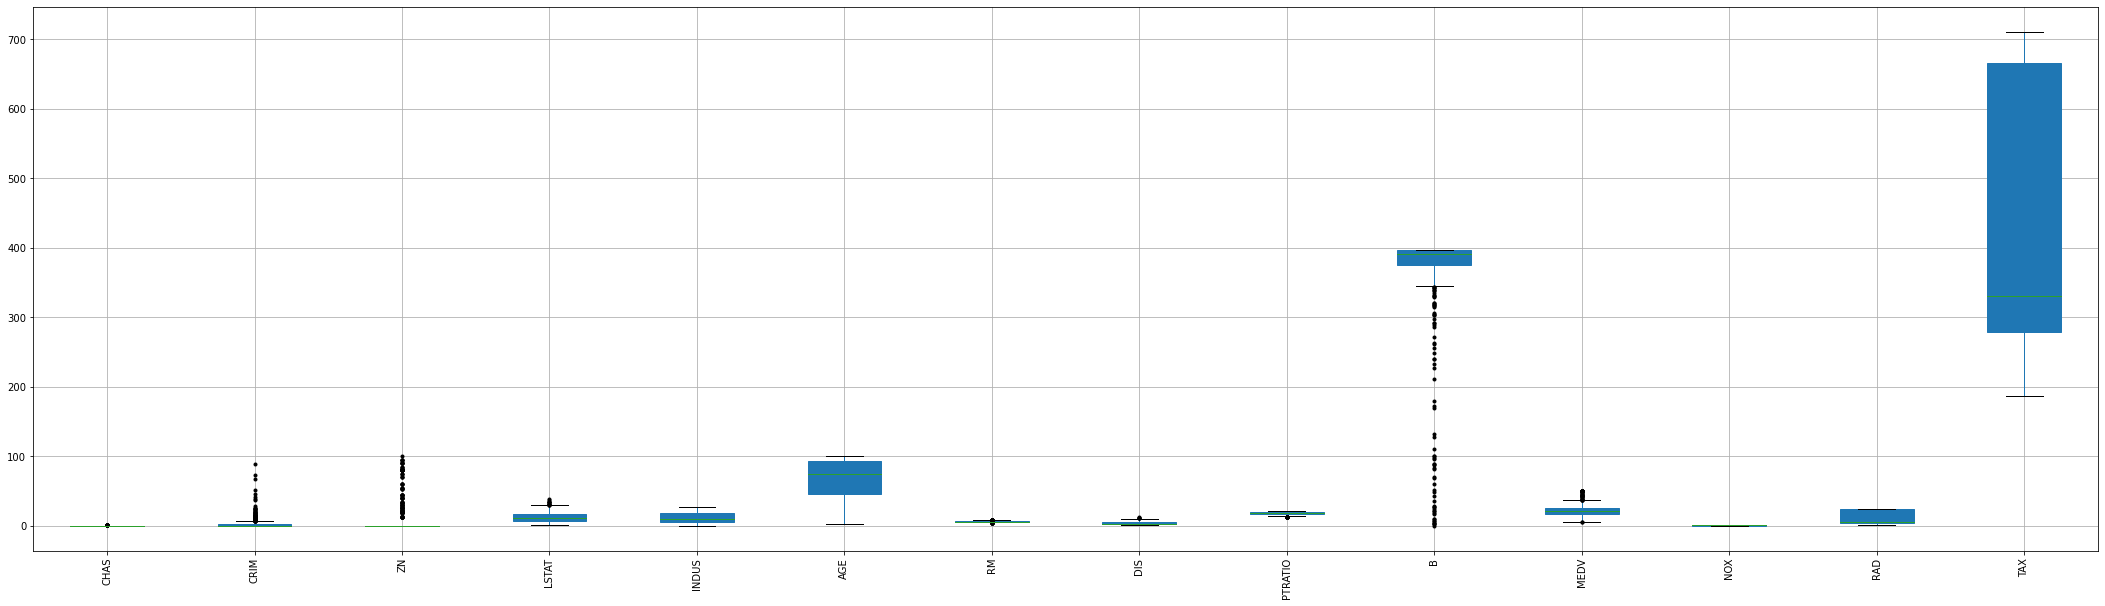

In [53]:
# Boxplot for all variables
plt.subplots(figsize=(37,10))
df1.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [54]:
Now, It's time for treatment of outliers

num_out = Numerical variables containing outliers (Missing values will be treated with median)--- "CRIM", "ZN", "RM", "DIS", "PTRATIO", "B", "LSTAT", "MEDV"

SyntaxError: EOL while scanning string literal (2276058679.py, line 1)

In [55]:
num_out = pd.concat([df1["CRIM"], df1["ZN"], df1["RM"], df1["DIS"], df1["PTRATIO"], df1["B"], df1["LSTAT"], df1["MEDV"]],axis=1)

In [56]:
num_out


,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,6.575,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,6.0622,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,21.0,391.99,11.43,22.4
502,0.04527,0.0,6.120,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,6.976,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,6.794,2.3889,21.0,393.45,6.48,22.0


(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'CRIM'),
  Text(2, 0, 'ZN'),
  Text(3, 0, 'RM'),
  Text(4, 0, 'DIS'),
  Text(5, 0, 'PTRATIO'),
  Text(6, 0, 'B'),
  Text(7, 0, 'LSTAT'),
  Text(8, 0, 'MEDV')])

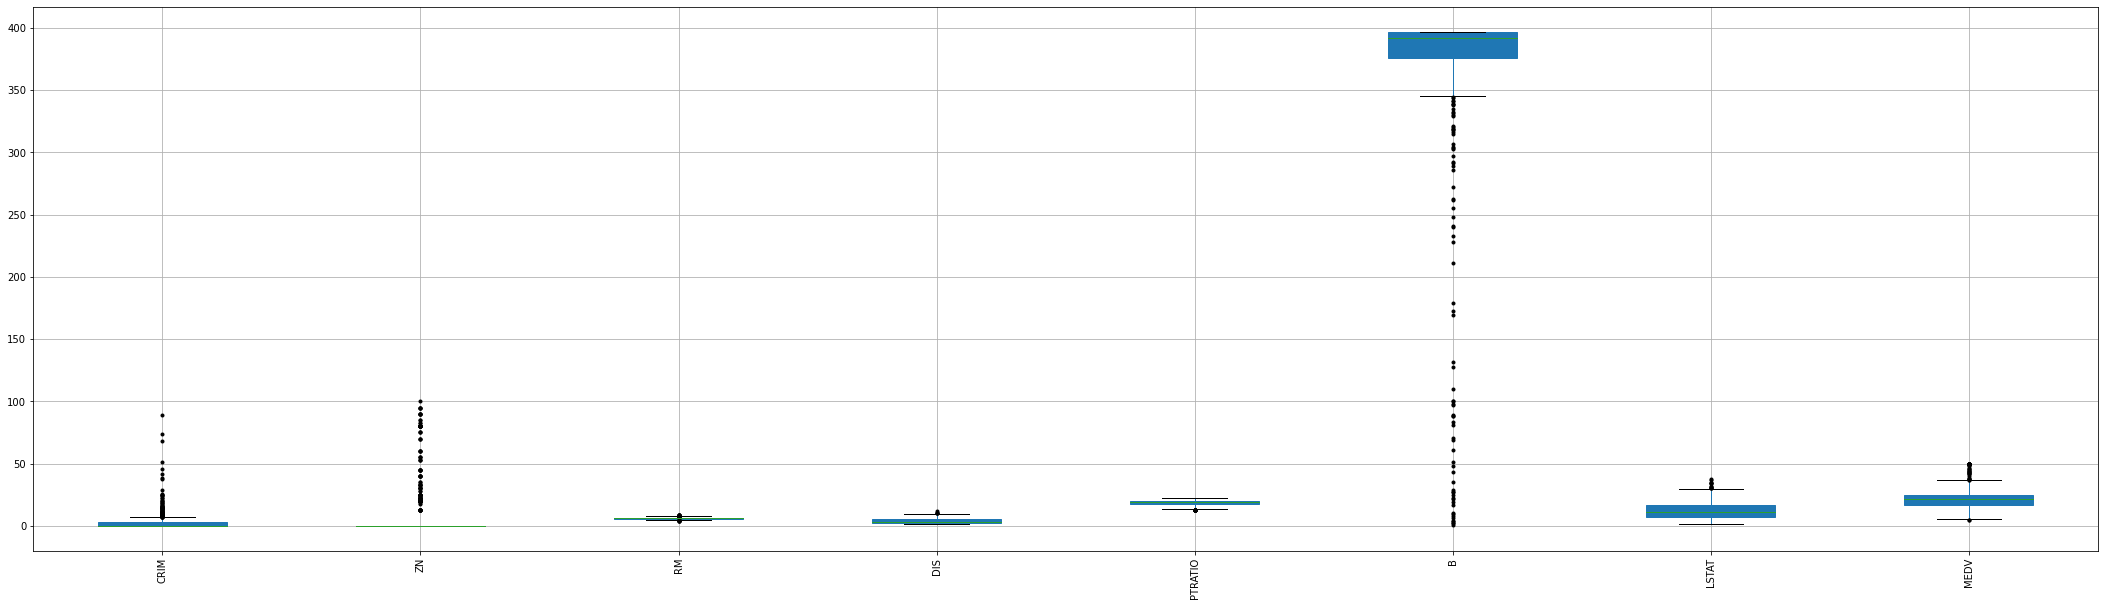

In [57]:
# Detecting outliers in "cat_out"
plt.subplots(figsize=(37,10))
num_out.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [58]:
# Getting the basic statistical summary of those variables containing outliers
num_out.describe()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,6.284634,3.795043,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,0.702617,2.105710,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,3.561000,1.129600,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.885500,2.100175,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,6.208500,3.207450,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,6.623500,5.188425,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,8.780000,12.126500,22.000000,396.900000,37.970000,50.000000


In [59]:
def  remove_outlier(feature):
    Q1 = np.percentile(num_out[feature], 25)
    Q3 = np.percentile(num_out[feature], 75)
    IQR = Q3 - Q1
    IQR *= 1.5
    
    minimum = Q1 - IQR # the acceptable minimum value
    maximum = Q3 + IQR # the acceptable maximum value
    
    median = num_out[feature].median()
    
    num_out.loc[num_out[feature] < minimum, feature] = median
    num_out.loc[num_out[feature] > maximum, feature] = median

In [60]:
# taking all the column

num_out = num_out.iloc[:, : ]
for i in range(len(num_out.columns)): 
        remove_outlier(num_out.columns[i])

In [61]:
# In "num_out" matrix, it contains all varibles
num_out = num_out.iloc[:, : ]

In [62]:
num_out

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.0,6.575,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,6.421,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.185,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,6.998,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,7.147,6.0622,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,21.0,391.99,11.43,22.4
502,0.04527,0.0,6.120,2.2875,21.0,396.90,9.08,20.6
503,0.06076,0.0,6.976,2.1675,21.0,396.90,5.64,23.9
504,0.10959,0.0,6.794,2.3889,21.0,393.45,6.48,22.0


In [63]:
# Removing the outliers
for i in range (3):
    for i in range(len(num_out.columns)):
        remove_outlier(num_out.columns[i])

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'CRIM'),
  Text(2, 0, 'ZN'),
  Text(3, 0, 'RM'),
  Text(4, 0, 'DIS'),
  Text(5, 0, 'PTRATIO'),
  Text(6, 0, 'B'),
  Text(7, 0, 'LSTAT'),
  Text(8, 0, 'MEDV')])

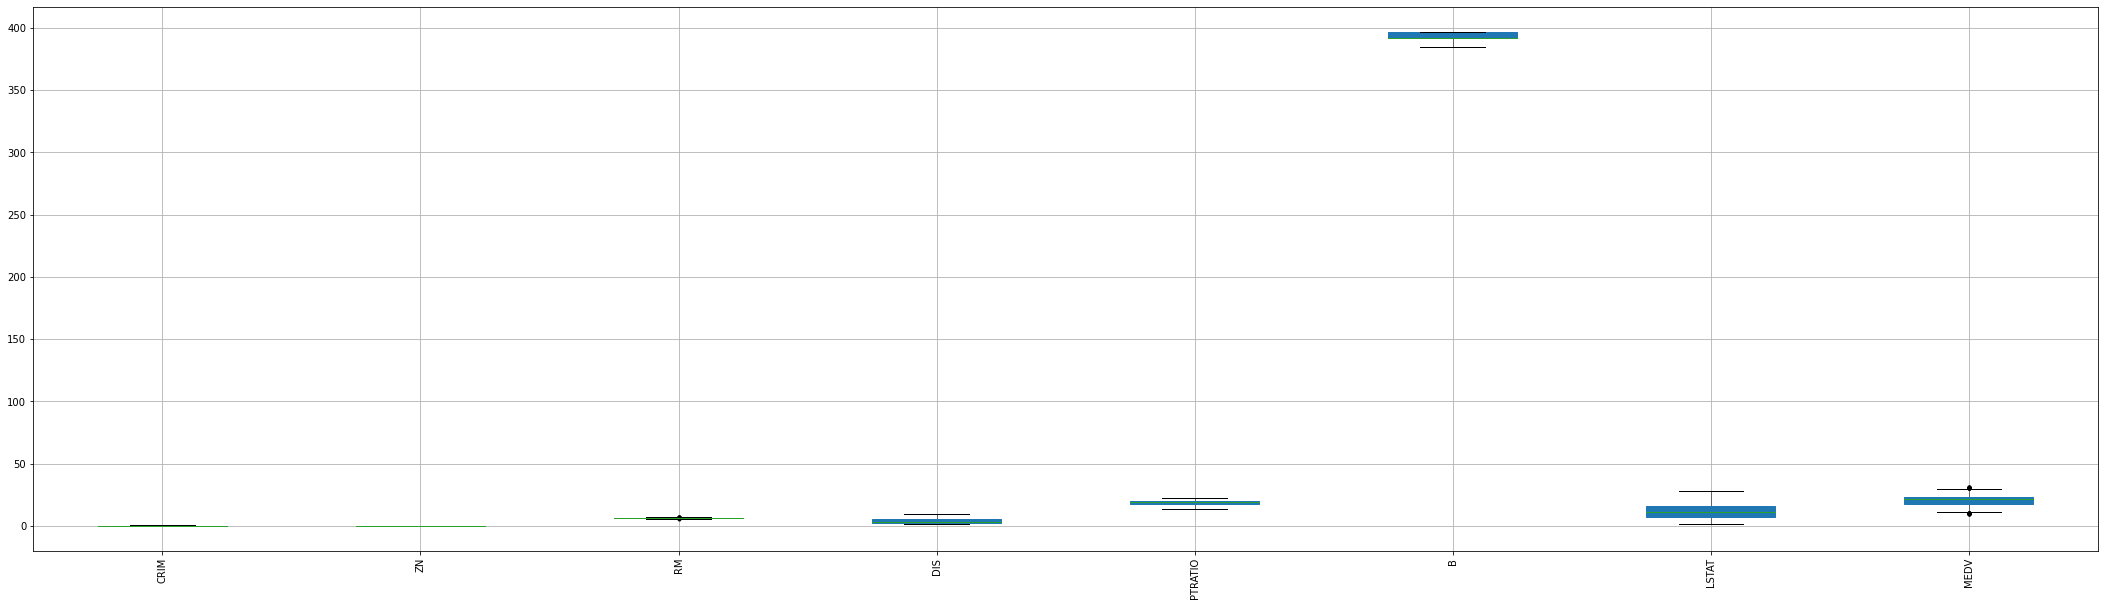

In [64]:
# After removing outliers, the following boxplots of each variable from "num_out" show, they have no more outliers
plt.subplots(figsize=(37,10))
num_out.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [65]:
# Finally, concatenating all variables after treatment of outliers with those varibales that have no outliers into a dataset
final_df = pd.concat([num_out, df1["CHAS"], df1["INDUS"], df1["NOX"], df1["AGE"], df1["RAD"], df1["TAX"]],axis=1)

In [66]:
final_df

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,MEDV,CHAS,INDUS,NOX,AGE,RAD,TAX
0,0.00632,0.0,6.575,4.0900,15.3,396.90,4.98,24.0,0.0,2.31,0.538,65.200000,1,296
1,0.02731,0.0,6.421,4.9671,17.8,396.90,9.14,21.6,0.0,7.07,0.469,78.900000,2,242
2,0.02729,0.0,7.185,4.9671,17.8,392.83,4.03,21.2,0.0,7.07,0.469,61.100000,2,242
3,0.03237,0.0,6.998,6.0622,18.7,394.63,2.94,21.2,0.0,2.18,0.458,45.800000,3,222
4,0.06905,0.0,7.147,6.0622,18.7,396.90,11.43,21.2,0.0,2.18,0.458,54.200000,3,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,6.593,2.4786,21.0,391.99,11.43,22.4,0.0,11.93,0.573,69.100000,1,273
502,0.04527,0.0,6.120,2.2875,21.0,396.90,9.08,20.6,0.0,11.93,0.573,76.700000,1,273
503,0.06076,0.0,6.976,2.1675,21.0,396.90,5.64,23.9,0.0,11.93,0.573,91.000000,1,273
504,0.10959,0.0,6.794,2.3889,21.0,393.45,6.48,22.0,0.0,11.93,0.573,89.300000,1,273


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'CRIM'),
  Text(2, 0, 'ZN'),
  Text(3, 0, 'RM'),
  Text(4, 0, 'DIS'),
  Text(5, 0, 'PTRATIO'),
  Text(6, 0, 'B'),
  Text(7, 0, 'LSTAT'),
  Text(8, 0, 'MEDV'),
  Text(9, 0, 'CHAS'),
  Text(10, 0, 'INDUS'),
  Text(11, 0, 'NOX'),
  Text(12, 0, 'AGE'),
  Text(13, 0, 'RAD'),
  Text(14, 0, 'TAX')])

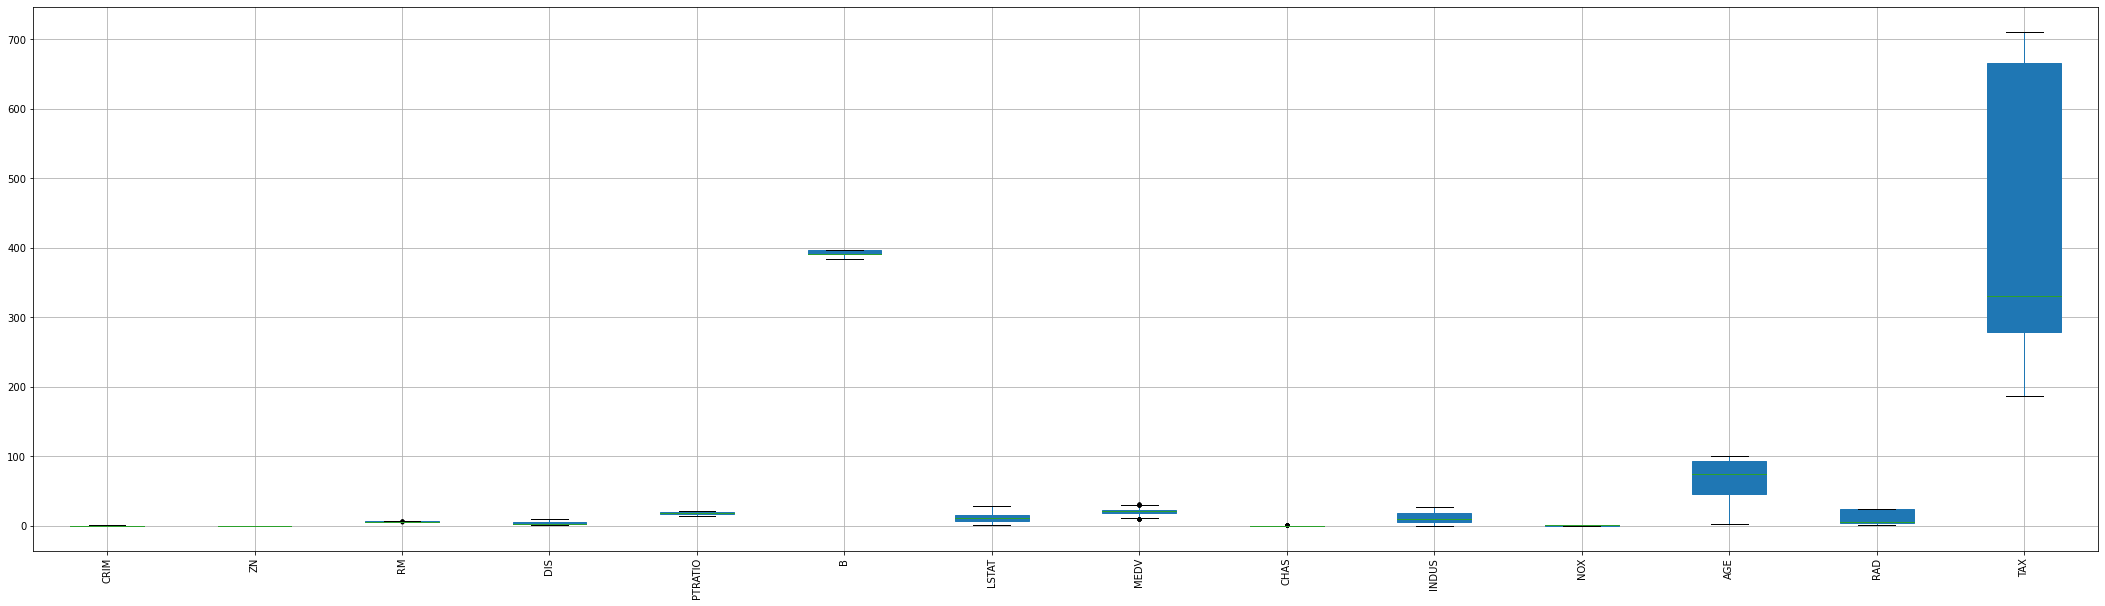

In [67]:
# Boxplot for the final dataset
plt.subplots(figsize=(37,10))
final_df.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)